### VOCAB -> Embedding해서 RNN 하나라도 돌려보기

임베딩 : Word2Vec 
RNN : LSTM

In [29]:
# 아아아아아 전처리 잘못했다 다시 Hannanum으로 해야겠다
from konlpy.tag import Hannanum
import string
import pandas as pd

hannanum = Hannanum()

file3 = pd.read_csv('../DATA/king_3_date.csv', encoding='utf-8', sep=';')

with open('../DATA/stopwords.txt', 'r', encoding='utf-8') as f:
    stop_words = f.readlines()
stop_words = [x.strip() for x in stop_words]
# print(stop_words)

vocab = {}

data = file3['text'].values
sentences = []
for line in data:
    # 토크나이징
    tokens = hannanum.nouns(line)
    # 불용어 제거
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [token for token in tokens if token not in string.punctuation]
    # 빈도수 계산
    for token in tokens:
        if token not in vocab:
            vocab[token] = 1
        else:
            vocab[token] += 1
    # 데이터프레임에 추가
    sentences.append(tokens)

vocab = sorted(vocab.items(), key=lambda x: x[1], reverse=True)

['가', '가까스로', '가령', '각', '각각', '각자', '각종', '갖고말하자면', '같다', '같이', '개의치않고', '거니와', '거바', '거의', '것', '것과 같이', '것들', '게다가', '게우다', '겨우', '견지에서', '결과에 이르다', '결국', '결론을 낼 수 있다', '겸사겸사', '고려하면', '고로', '곧', '공동으로', '과', '과연', '관계가 있다', '관계없이', '관련이 있다', '관하여', '관한', '관해서는', '구', '구체적으로', '구토하다', '그', '그들', '그때', '그래', '그래도', '그래서', '그러나', '그러니', '그러니까', '그러면', '그러므로', '그러한즉', '그런 까닭에', '그런데', '그런즉', '그럼', '그럼에도 불구하고', '그렇게 함으로써', '그렇지', '그렇지 않다면', '그렇지 않으면', '그렇지만', '그렇지않으면', '그리고', '그리하여', '그만이다', '그에 따르는', '그위에', '그저', '그중에서', '그치지 않다', '근거로', '근거하여', '기대여', '기점으로', '기준으로', '기타', '까닭으로', '까악', '까지', '까지 미치다', '까지도', '꽈당', '끙끙', '끼익', '나', '나머지는', '남들', '남짓', '너', '너희', '너희들', '네', '넷', '년', '논하지 않다', '놀라다', '누가 알겠는가', '누구', '다른', '다른 방면으로', '다만', '다섯', '다소', '다수', '다시 말하자면', '다시말하면', '다음', '다음에', '다음으로', '단지', '답다', '당신', '당장', '대로 하다', '대하면', '대하여', '대해 말하자면', '대해서', '댕그', '더구나', '더군다나', '더라도', '더불어', '더욱더', '더욱이는', '도달하다', '도착하다', '동시에', '동안', '된바에야', '된이상', '두번째로', '둘', '둥둥', '뒤따라', '뒤이어'

In [1]:
print('vocab size:', len(vocab))
# vocab 일부만 출력
i = 0
for word, freq in vocab:
    print(f'[{word}: {freq}]', end=', ')
    i += 1
    if i > 100:
        break

NameError: name 'vocab' is not defined

In [31]:
# print(sentences[0])    # 이제 이걸 시리즈로 만들어서 데이터프레임에 추가

file3['tokenized'] = sentences

['지신사(知申事)', '정흠지(鄭欽之)', '포천(抱川)', '어머니', '뵙고', '허락', '술', '고']


In [ ]:
file3.to_csv('../DATA/king_3_tokenized.csv', encoding='utf-8', sep=';')

1. 전처리 오류로 토크나이징하면서 불용어 제거도 했다
2. 이참에 빈도수도 측정해 어휘 사전을 만들었다
3. file3에 넣는 과정이 필요하다

In [37]:
# vocab 한 글자 단어 제거
vocab = [x for x in vocab if len(x[0]) > 1]
print('vocab size:', len(vocab))
for word, freq in vocab:
    print(f'[{word}: {freq}]', end=', ')
    i += 1
    if i > 100:
        break

vocab size: 157143
[사람: 16973], 

In [ ]:
# %pip install wordcloud

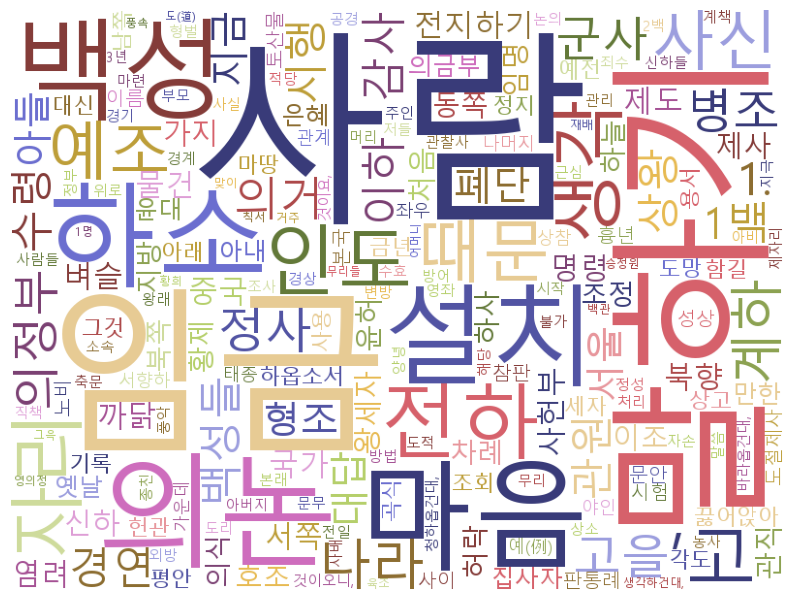

In [41]:
# 시각화 : 워드클라우드
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', background_color='white', width=800, height=600, colormap='tab20b')
cloud = wc.generate_from_frequencies(dict(vocab))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

### VOCAB 완성 : Word2Vec로 임베딩

Word2Vec에 토큰을 넣으면 임베딩된 벡터를 생성

In [ ]:
# Word2Vec 학습
from gensim.models import Word2Vec

# Word2Vec 학습에 사용할 데이터 : sentences



문장 최대 길이: 9985
문장 최소 길이: 0
문장 평균 길이: 44.11093154050035
문장 길이 중간값: 15.0
문장 길이 표준편차: 119.19261421675503


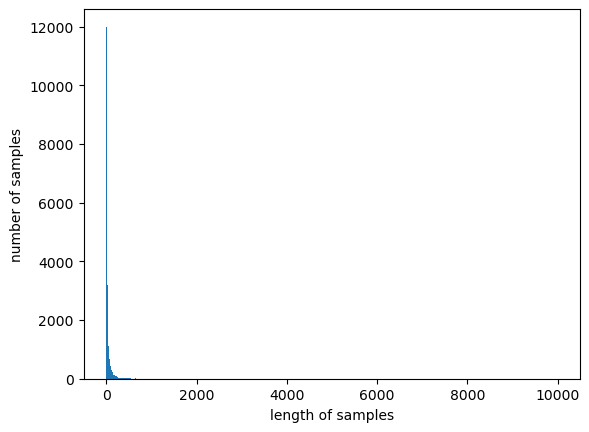

In [49]:
# sentences의 길이 분석
print('문장 최대 길이:', max(len(x) for x in sentences))
print('문장 최소 길이:', min(len(x) for x in sentences))
print('문장 평균 길이:', sum(map(len, sentences)) / len(sentences))
print('문장 길이 중간값:', np.median([len(x) for x in sentences]))
print('문장 길이 표준편차:', np.std([len(x) for x in sentences]))

# plot
import matplotlib.pyplot as plt

plt.hist([len(x) for x in sentences], bins=1000)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()


글자 수 편차가 엄청 크다 : 평균 44, 중간값 15, 최대 9985

In [ ]:
# 

### 일단 모델 박아 넣자

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [ ]:
class TextModel(nn.Module):
    """
    텍스트 분류 모델 정의; nn.EmbeddingBag 사용 연습
    """
    
    def __init__(self, VOCAB_SIZE, EMBED_DIM, HIDDEN_SIZE, NUM_CLASS):
        """_summary_ : 모델 초기화 함수
        
        Args:
            VOCAB_SIZE (int): 어휘 사전 크기
            EMBED_DIM (int): 임베딩 차원 (단어 벡터 차원)
            HIDDEN_SIZE (int): 은닉층 크기
            NUM_CLASS (int): 분류 클래스 개수
        """
        super().__init__()
        self.embedding = nn.EmbeddingBag(VOCAB_SIZE, EMBED_DIM, sparse=False)
        self.fc = nn.Linear(EMBED_DIM, NUM_CLASS)
        self.init_weights()     # 가중치 초기화 : 학습 전에 사용
        
    def init_weights(self):
        """_summary_ : 가중치 초기화 함수
        
        .unform_() : 균등 분포로 weight 초기화
        .zero_() : 0으로 초기화
        -initrange ~ initrange 사이의 값으로 초기화
        """
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    def forward(self, text, offsets):
        """_summary_ : 모델 forward 함수
        embedding할 데이터를 모두 받고
        offsets 기준으로 끊어 embedding
        
        Args:
            text (Tensor) : 텍스트 데이터
            offsets (Tensor) : 각 시퀀스의 시작 인덱스
        
        return : embedding return : 
        """
        embedded = self.embedding(text, offsets)
        return self.fc(embedded)

In [ ]:
# CNN 모델 정의
class TextCNN(nn.Module):
    """텍스트 분류 모델 정의; nn.EmbeddingBag 사용 연습
    """
    def __init__(self, VOCAB_SIZE, EMBED_DIM, NGRAM, NUM_CLASS):
        """_summary_ : 모델 초기화 함수
        
        Args:
            VOCAB_SIZE (int): 어휘 사전 크기
            EMBED_DIM (int): 임베딩 차원 (단어 벡터 차원)
            NGRAM (int): n-gram 크기
            NUM_CLASS (int): 분류 클래스 개수
        """
        super().__init__()
        self.embedding = nn.EmbeddingBag(VOCAB_SIZE, EMBED_DIM, sparse=False)
        self.conv = nn.Conv1d(EMBED_DIM, 128, kernel_size=NGRAM)
        self.fc = nn.Linear(128, NUM_CLASS)
        self.init_weights()     # 가중치 초기화 : 학습 전에 사용
        
    def init_weights(self):
        """_summary_ : 가중치 초기화 함수
        .unform_() : 균등 분포로 weight 초기화
        .zero_() : 0으로 초기화
        -initrange ~ initrange 사이의 값으로 초기화
        """
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    def forward(self, text, offsets):
        """_summary_ : 모델 forward 함수
        embedding할 데이터를 모두 받고
        offsets 기준으로 끊어 embedding
        
        Args:
            text (Tensor) : 텍스트 데이터
            offsets (Tensor) : 각 시퀀스의 시작 인덱스
        
        return : embedding return : 
        """
        embedded = self.embedding(text, offsets)
        embedded = embedded.unsqueeze(1)
        conved = self.conv(embedded)
        conved = F.relu(conved)
        pooled = F.max_pool1d(conved, conved.shape[2])
        pooled = pooled.squeeze(2)
        return self.fc(pooled)

In [ ]:
# custom dataset
# - torch.utils.data.Dataset 상속
# - __len__, __getitem__ 구현
# - data : text, label
# - text : 

In [ ]:
from torch.utils.data import DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# 데이터 전처리 함수
def collate_batch(batch):
    """
    batch : (label, text)
    """
    label_list, text_list, offsets = [], [], [0]  # offsets : 텍스트 길이

    for _label, _text in batch:
        # (1) 라벨 정수 인코딩
        label_list.append(label_pipeline(_label))  
        # (2) 텍스트 정수 인코딩
        processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)
        
        text_list.append(processed_text)  # 텍스트 리스트에 추가
        offsets.append(processed_text.size(0))  # 텍스트 길이 추가

    # tensor 변환
    label_list = torch.tensor(label_list, dtype=torch.int64)
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    text_list = torch.cat(text_list)

    return label_list.to(device), text_list.to(device), offsets.to(device)

# 데이터 로더 생성
dataloader = DataLoader(
    train_iter, batch_size=8, shuffle=False, collate_fn=collate_batch
)

In [ ]:
# 학습 관련 하이퍼파라미터, 인스턴스 설정
HIDDEN_SIZE = 3
EMBED_DIM = 64
VOCAB_SIZE = len(vocab)
NUM_CLASS = len(set([label for label, _ in train_iter]))
EPOCHS = 10
LR = 5
BATCh_SIZE = 64

In [ ]:
# 학습 관련 인스턴스
model = TextModel(VOCAB_SIZE, EMBED_DIM, HIDDEN_SIZE, NUM_CLASS).to(device)

# 손실함수, 옵티마이저 설정
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)

In [ ]:
total_acc, total_count = 0, 0
log_interval = 300

# 학습 시작
for idx, (label, text, offsets) in enumerate(dataloader):
    
    label, text, offsets = label.to(device), text.to(device), offsets.to(device)
    
    # 학습 진행
    pred = model(text, offsets)   
    # offset : 텍스트 길이
    # 결국 EmbeddingBag(text, offsets)의 return 값 -> fc() 을 반환
    # = 텍스트와 자를 길이를 입력하면 
    
    optimizer.zero_grad()
    loss = criterion(pred, label)
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1) 
    # - gradient clipping; 양극단 값을 잘라 그래디언트 폭주 방지
    optimizer.step()
    
    total_acc += (pred.argmax(1) == label).sum().item()
    total_count += label.size(0)

In [ ]:
# 예측함수
def predict(model, text, text_pipeline):
    """_summary_ : 예측 함수
    
    Args:
        model (nn.Module) : 학습된 모델
        text (str) : 예측할 텍스트
        text_pipeline (function) : 텍스트 전처리 함수
    
    return : 예측 결과
    """
    with torch.no_grad():
        text = torch.tensor(text_pipeline(text), dtype=torch.int64).to(device)
        text = text.unsqueeze(0)
        offsets = torch.tensor([0]).to(device)
        pred = model(text, offsets)
        return pred.argmax(1).item()

### Embedding : Word2Vec -> 새 파일